In [78]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml  # mnist datasetini yüklemek için gerekli...
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [79]:
df = fetch_openml('mnist_784', parser = 'auto')


In [80]:
# verileri fotoğraf olarak görmek için bir fonksiyon yazalım

def showImage(dt,index):
    some_digit = dt.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image, cmap='gray')
    plt.axis('off')
    plt.show()

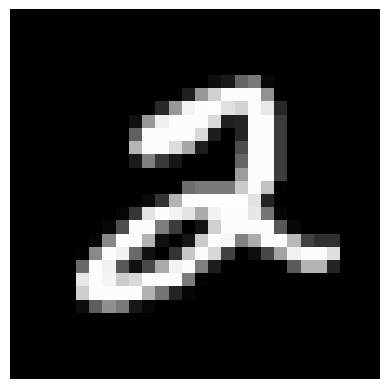

In [81]:
showImage(df.data,5)

In [82]:
# verileri eğitim ve test olarak ayırıyoruz
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# rakam tahmin etmek için test fotoğraflarını kopyalıyoruz. 

test = X_test.copy()

In [84]:
#Verilerimizi Scale etmemiz gerekiyor çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor 
#bu nedenle mutlaka scaling işleminden geçiriyoruz. 

scaler = StandardScaler()

In [85]:
# Scaler'ı sadece training set üzerinde fit yapmamız yeterli

scaler.fit(X_train)

# Transform işlemini hem training sete hemde test sete yapmamız gerekiyor
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### PCA işlemi

In [87]:
pca = PCA(.95) # Varyansı %95 oranında korumayı hedefliyoruz
pca.fit(X_train)
pca.n_components_ # 784 boyutu ne kadara düşürdüğünü kontrol ediyoruz.

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [88]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı seçerek logisticregression nesnemizi oluşturuyoruz.
logisticRegression = LogisticRegression(solver = 'lbfgs', max_iter=10000)
logisticRegression.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [104]:
logisticRegression.predict(X_test[1].reshape(1,-1))

array(['4'], dtype=object)

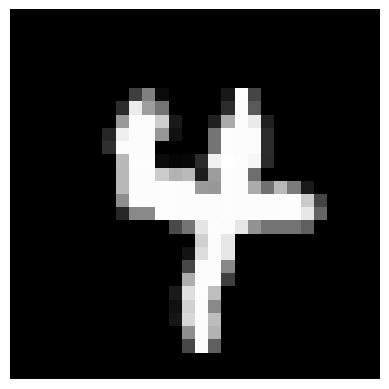

In [108]:
showImage(test,1)

In [109]:
# Başarı oranını yazdıralım
logisticRegression.score(X_test,y_test)

0.9164285714285715